Importing useful python packages

In [30]:
import google.datalab.bigquery as bq
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

Reading dataset

In [2]:
%%bq query -n requests_test_train
SELECT *
FROM (
  SELECT *
  FROM `omina-gcp-resource.omina_titanic_dataset.test_data` UNION ALL
  SELECT * except (survived)
  FROM `omina-gcp-resource.omina_titanic_dataset.train_data` )
#WHERE class = 3
ORDER BY id ASC

In [4]:
df_test_train = requests_test_train.execute(output_options=bq.QueryOutput.dataframe()).result()

Try basic matplotlib plot commands

/usr/local/envs/py2env/lib/python2.7/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family [u'sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


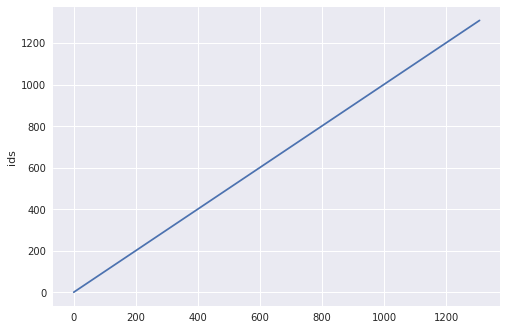

In [5]:
plt.plot(df_test_train.id)
plt.ylabel('ids')
plt.show()

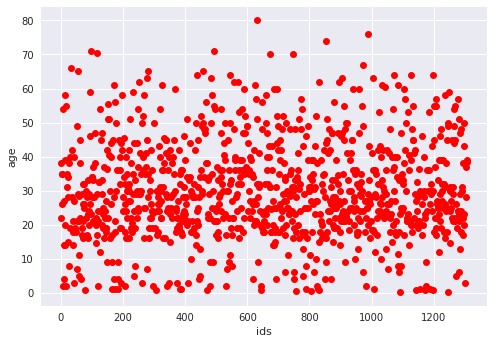

In [6]:
plt.plot(df_test_train.id, df_test_train.age, 'ro')
plt.xlabel('ids')
plt.ylabel('age')
plt.show()

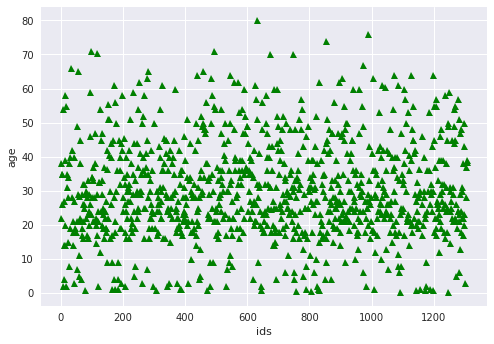

In [7]:
plt.plot(df_test_train.id, df_test_train.age, 'g^')
plt.xlabel('ids')
plt.ylabel('age')
plt.show()

In [18]:
def f(t):
  return np.sqrt(t) * np.cos(2*np.pi*t)

In [39]:
t1 = df_test_train.as_matrix(columns=df_test_train.columns[4:5])
t1 = t1[~np.isnan(t1)]
t2 = df_test_train.as_matrix(columns=df_test_train.columns[0:1])

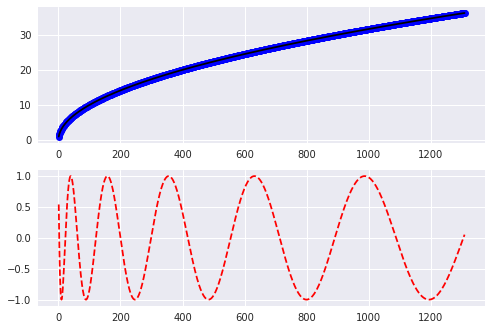

In [26]:
plt.figure(1)
plt.subplot(211)
plt.plot(t2, f(t2), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(np.sqrt(t2) * np.cos(2*np.pi*t2)), 'r--')
plt.show()

Plotting Histogram

In [ ]:
n, bins, patches = plt.hist(t1, alpha = 0.5)
plt.show()

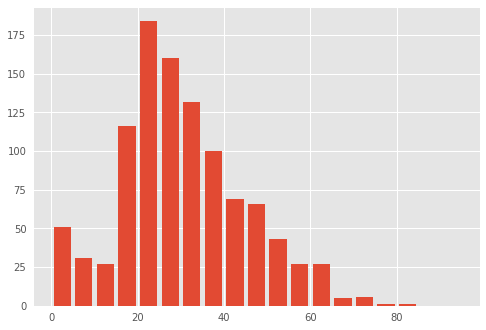

In [42]:
style.use('ggplot')
bins = np.arange(0.0,100.0,5.0)
plt.hist(t1, bins, histtype = 'bar', rwidth = 0.8)
plt.show()